# **About this Project:**

This is a Machine learning Capstone project. It is a Linear Regression problem statement.

This dataset contains information like price of shares,No. of treds,No. of shares,Deliverable Quantity,Spread High-Low,Spread Close-Open from Jan 2012 to 21st April 2022.(span- 10years)

# **Group Name - DSA (Data Science Aspirants)**

Unnati Joshi

komal Dhokai

Dharvi Jagad

Keyur Prajapti

# **Project Title - Nestle Stock Price Prediction**

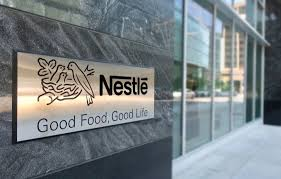

# **Problem Statment** 
Before Investing into any company an investor should study Historical stock Prices of that company , analyze the Opening-closing and High/Low Prices for better understanding of the performance of that company in share markets. Here we are predicting the Closing Price of Nestle Shares with the available Independent Features.

# What is stock?
A stock, also known as equity, is a security that represents the ownership of a fraction of the issuing corporation. Units of stock are called "shares" which entitles the owner to a proportion of the corporation's assets and profits equal to how much stock they own.

info_stock_mobile_v2.svg

# What is stock price prediction?
Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.

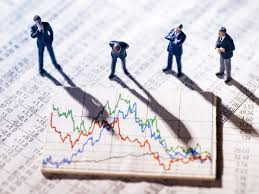

# **Data Description**

# Key Attribute of Data set:

**Date:** It shows the Date of that day and in this Data set it is uniquely define

**Open Price:** The opening price is the price from the first transaction of a business day.

**High Price:** The highest price at which a stock traded during the course of the trading day and is typically higher than the closing or equal to          the opening.

**Low Price:** The lowest price that a stock trades in that day.

**Close Price:** The closing price is the last price anyone paid for a share of that stock during the business hours of the exchange where the                 stock trades.

**WAP:** Weighted Average Price Of The Day.

**No.of Shares:** Tells us how many shares of a company are currently owned by investors.

**No. of Trades:** The total number of shares transacted between a buyer and seller during transation.

**Total Turnover (Rs.):** (It's multiplication of WAP and No.of shares in a day)Total Stock turnover is considered to be a measure of sales performance

**Deliverable Quantity:** Deliverable quantity is the total number of shares that were marked for delivery on a certain date.

**% Deli. Qty to Traded Qty :** Persentage of Deliverable Quantity's value

**Spread High-Low:** The difference between the highest price that a buyer is willing to pay for an asset and the lowest price that a seller is willing to accept.

**Spread Close-Open:** The difference between the close price that a buyer is willing to pay for an asset and the open price that a seller is willing to accept.

# Import Neccesary Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm

# **Data Preparation**

#### Read the dataset and print the first five observations.

In [2]:
# load the csv file
# store the data in 'df_nestle'
df_nestle=pd.read_csv("nestle.csv")

# display first five observations using head()
df_nestle.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000
1,20-April-2022,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000
2,19-April-2022,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000
3,18-April-2022,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000
4,13-April-2022,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000


In [3]:
# use 'shape' to check the dimension of data
df_nestle.shape

(2553, 13)

**Interpretation:** The data has 2553 observations and 13 columns.

In [4]:
# use 'info()' to understand the dataset and it also tells that null value are present or not 
df_nestle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

**Interpretation:** The data have 1 categorical column and contain 4 null value that columns are Deliverable Quantity and % Deli. Qty to Traded Qty.

# Data Cleaning

In this step we can change the name of column for understand the data easily

In [5]:
df_nestle.columns=['Date','Open_Price','High_Price','Low_Price','Close_Price','Weighted_avg_price_of_the_Day','Number_of_Shares','Number_of_Trades','Total_Turnover(Rs.)','Deliverable_Quantity','Percentage_Deliverable_Quantity_to_Traded_Quantity','Spread_High_Low','Spread_Close_Open']

In [6]:
# check the data
df_nestle.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Weighted_avg_price_of_the_Day,Number_of_Shares,Number_of_Trades,Total_Turnover(Rs.),Deliverable_Quantity,Percentage_Deliverable_Quantity_to_Traded_Quantity,Spread_High_Low,Spread_Close_Open
0,21-April-2022,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000
1,20-April-2022,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000
2,19-April-2022,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000
3,18-April-2022,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000
4,13-April-2022,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000


Check whether the outlier present in data or not using Boxplot

In [7]:
# check using Describe function
df_nestle.describe().T

,count,mean,std,min,25%,50%,75%,max
Open_Price,2553.000000,9338.023188,4940.554627,3970.000000,5391.000000,6804.000000,13299.950000,20452.000000
High_Price,2553.000000,9429.710419,4986.783271,3995.000000,5445.000000,6868.900000,13690.950000,20599.950000
Low_Price,2553.000000,9226.855934,4878.971233,3930.000000,5327.200000,6747.300000,12850.000000,20243.800000
Close_Price,2553.000000,9324.960556,4932.776537,3942.450000,5383.500000,6809.950000,13455.450000,20439.450000
Weighted_avg_price_of_the_Day,2553.000000,9327.503179,4929.373727,3936.768632,5385.347807,6813.150538,13387.505382,20417.372402
Number_of_Shares,2553.000000,5521.380337,10416.942384,39.000000,1572.000000,2618.000000,4981.000000,154684.000000
Number_of_Trades,2553.000000,1004.099491,1137.547557,6.000000,442.000000,731.000000,1199.000000,20964.000000
Total_Turnover(Rs.),2553.000000,47619226.422248,85028877.597759,172142.000000,11721329.000000,22220739.000000,49384650.000000,2155655355.000000
Deliverable_Quantity,2551.000000,3264.052528,8652.860793,33.000000,653.500000,1123.000000,2225.500000,152993.000000
Percentage_Deliverable_Quantity_to_Traded_Quantity,2551.000000,49.024461,19.119739,1.270000,35.575000,46.870000,59.130000,98.930000


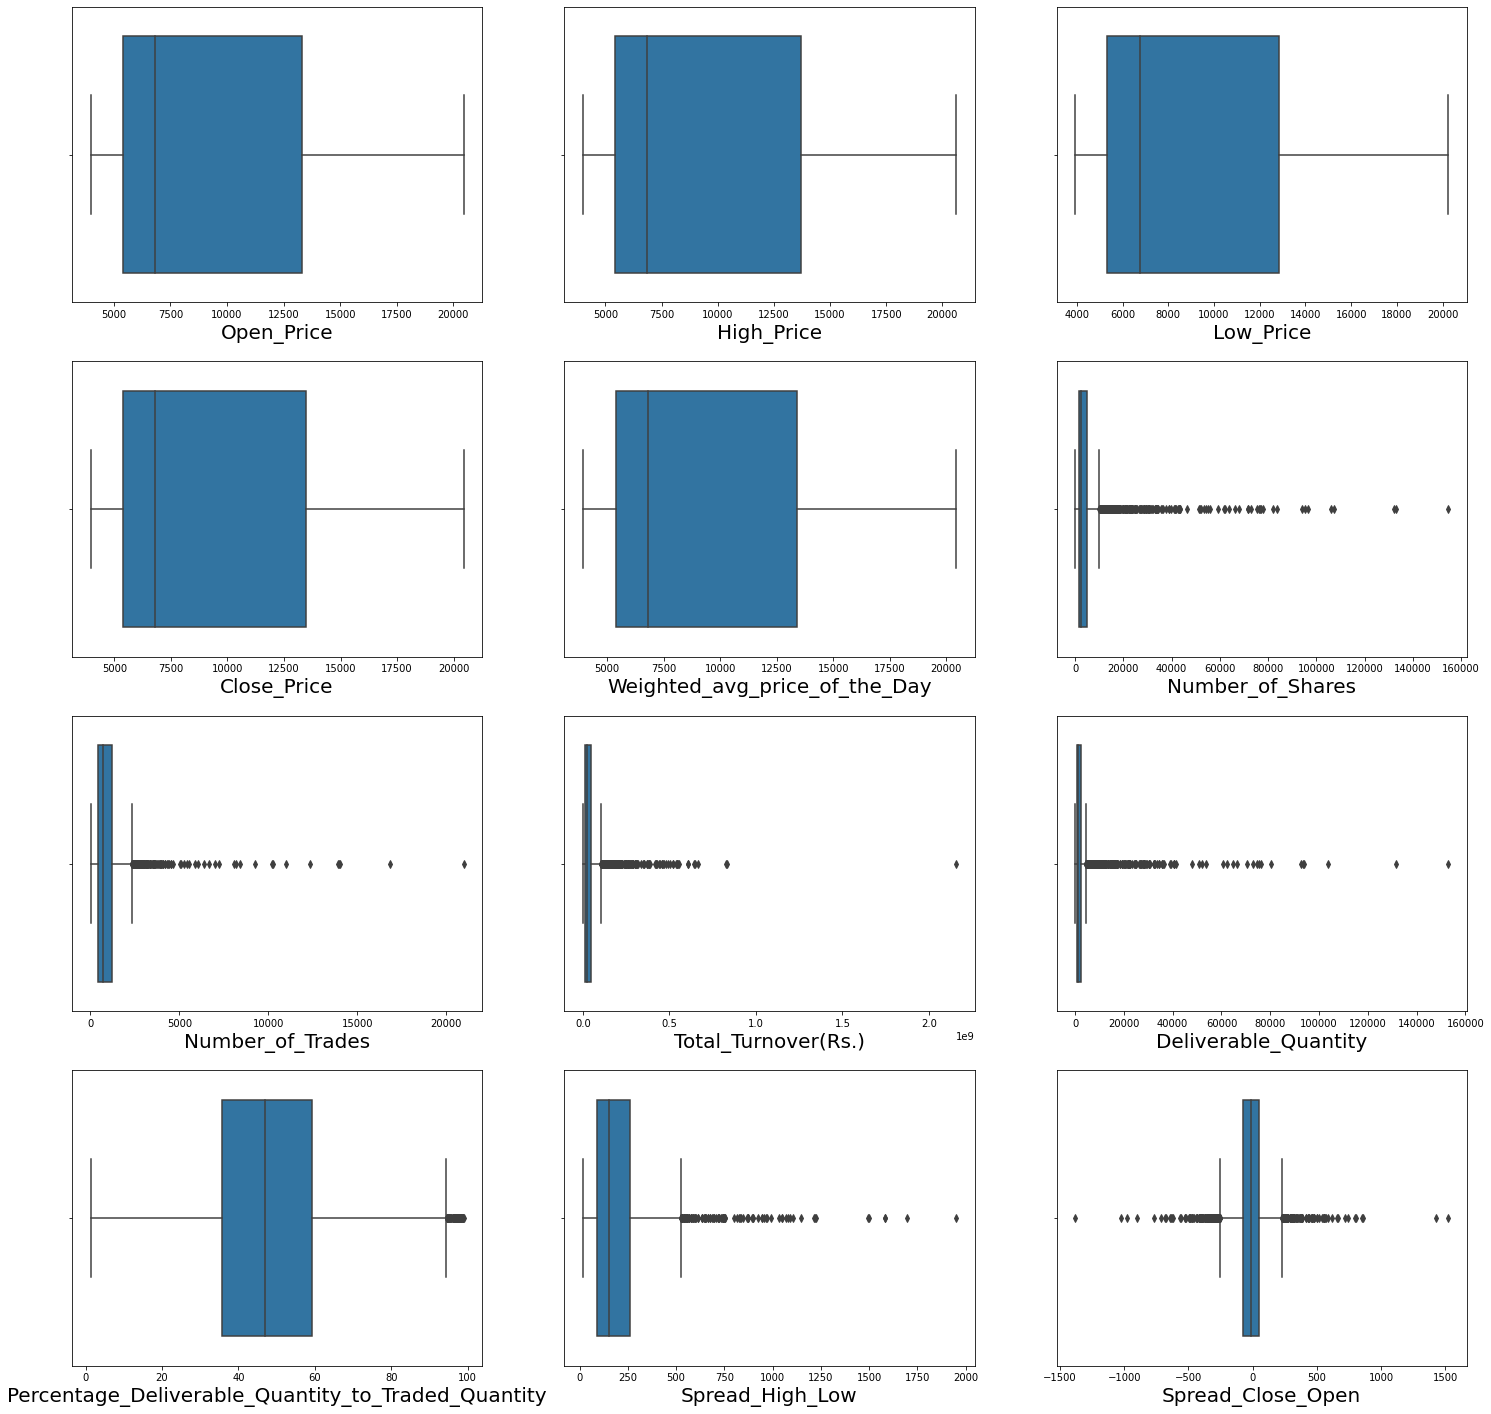

In [8]:
df_num=df_nestle.select_dtypes(include=[np.number])
fig,ax=plt.subplots(4,3,figsize=(25,25))

for variable,subplot in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(x=df_num[variable],orient='h',whis=1.5,ax=subplot)
    z.set_xlabel(variable,fontsize=20)

**interpretation:** From above Boxplot  we can say that column Number_of_Shares,Number_of_Trades,Total_Turnover(Rs.),Deliverable_Quantity,Percentage_Deliverable_Quantity_to_Traded_Quantity,Spread_High_Low,Spread_Close_Open column has outlier

Null Value Handling or Drop the Null Values

In [9]:
# Check the null values 
df_nestle.isnull().sum()

Date                                                  0
Open_Price                                            0
High_Price                                            0
Low_Price                                             0
Close_Price                                           0
Weighted_avg_price_of_the_Day                         0
Number_of_Shares                                      0
Number_of_Trades                                      0
Total_Turnover(Rs.)                                   0
Deliverable_Quantity                                  2
Percentage_Deliverable_Quantity_to_Traded_Quantity    2
Spread_High_Low                                       0
Spread_Close_Open                                     0
dtype: int64

In [10]:
# drop the null values
df_nestle.dropna(inplace=True)

**interpretation**: From above data we have seen that there is only 4 null values in column Deliverable_Quantity and Percentage_Deliverable_Quantity_to_Traded_Quantity so we can drop the null values

# Exploratory Data Analysis

Bivariate Analysis

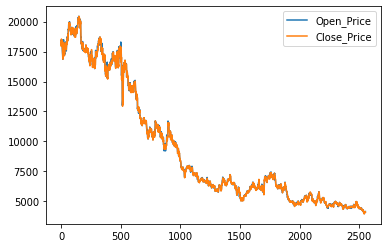

In [11]:
plt.plot('Open_Price',data=df_nestle)
plt.plot('Close_Price',data=df_nestle)
plt.legend()

**interpretation:** Here we can see that there is no difference between Open_Price & Close_Price at the end of Day

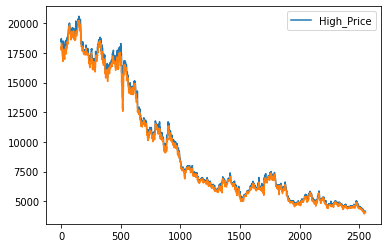

In [12]:
plt.plot('High_Price',data=df_nestle)
plt.plot(df_nestle['Low_Price'])
plt.legend()

**interpretation:** Here we can see that there is no difference between High_Price & Low_Price at the end of the Day

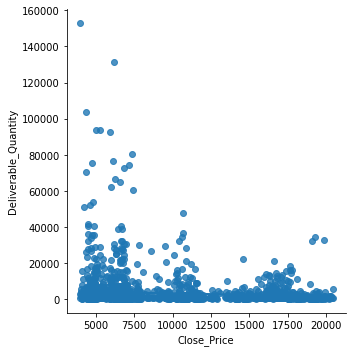

In [13]:
sns.lmplot(x='Close_Price',y='Deliverable_Quantity',data=df_nestle,palette='viridis')


# When clse price is low then there Deliverable_Quantity is high

Multivariate Analysis

In [14]:
# prepare dataset for pair plot 
price=df_nestle[['Open_Price','Close_Price','High_Price','Low_Price']]

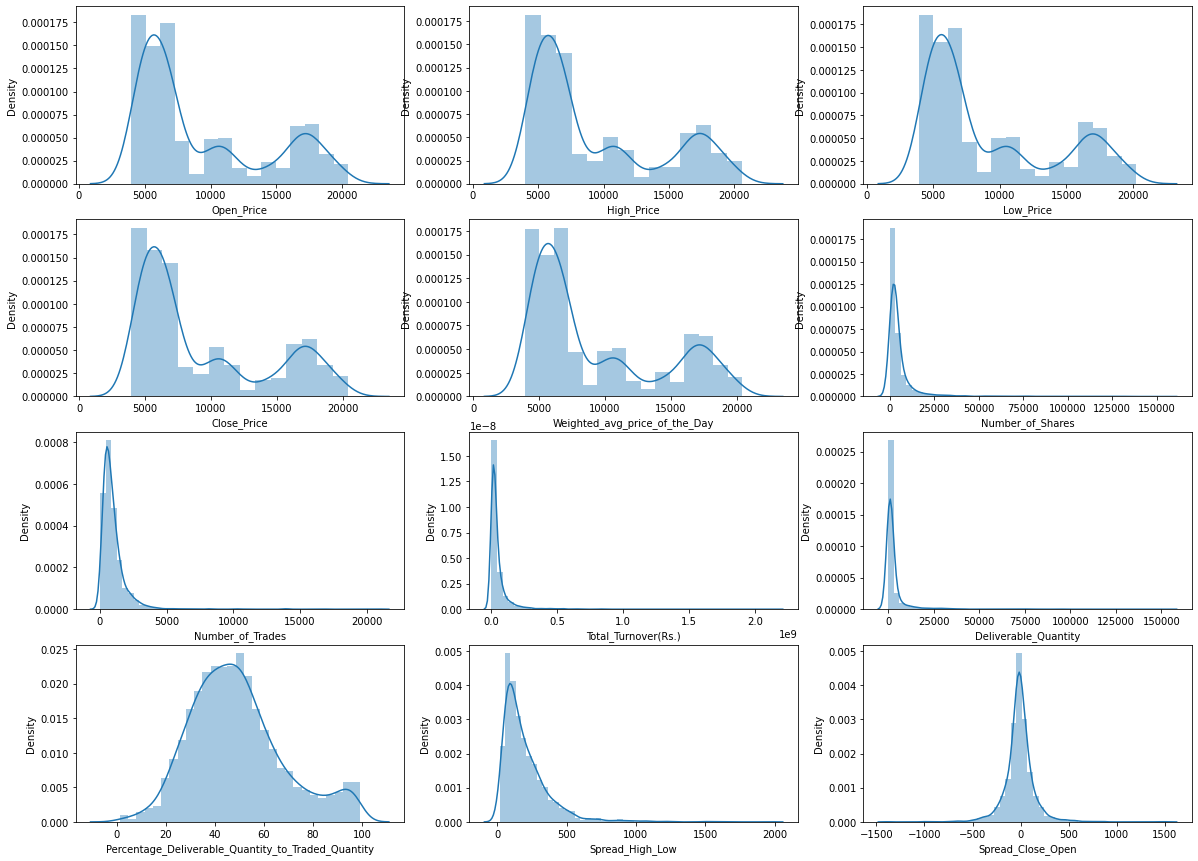

In [15]:
num_col=[col for col in df_nestle.columns if df_nestle[col].dtype!='object']
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_col:
      if plotnumber<=14:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_nestle[column])
        plt.xlabel(column)
      plotnumber+=1

In [16]:
df_nestle.skew()

Open_Price                                           0.838943
High_Price                                           0.834516
Low_Price                                            0.841663
Close_Price                                          0.837990
Weighted_avg_price_of_the_Day                        0.836785
Number_of_Shares                                     6.503484
Number_of_Trades                                     7.154183
Total_Turnover(Rs.)                                  8.950938
Deliverable_Quantity                                 8.153823
Percentage_Deliverable_Quantity_to_Traded_Quantity   0.602990
Spread_High_Low                                      2.959270
Spread_Close_Open                                    0.397781
dtype: float64

<AxesSubplot:>

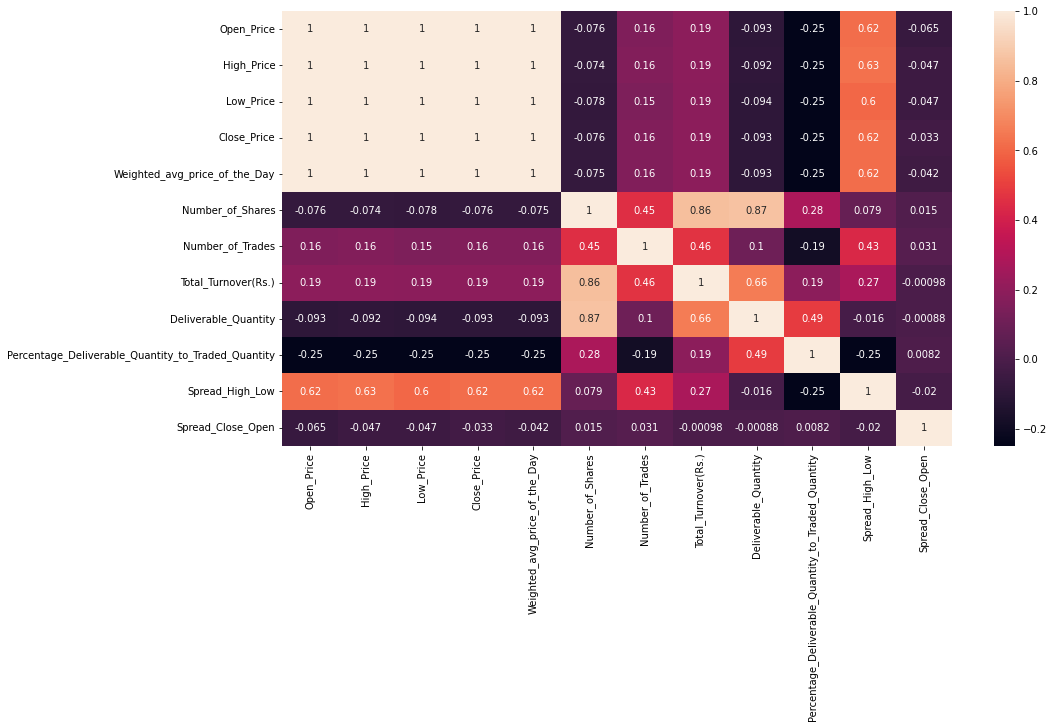

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df_nestle.corr(),annot=True)

**interpretation** : Target variable Close_Price is correlated with Weighted_avg_Price_of_the_Day,Open_Price,High_Price,Low_Price

# Feature Extraction

In [18]:
# convert the datatype of date from object to datetime
df_nestle['Date']=pd.to_datetime(df_nestle.Date)

In [19]:
df_nestle.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Weighted_avg_price_of_the_Day,Number_of_Shares,Number_of_Trades,Total_Turnover(Rs.),Deliverable_Quantity,Percentage_Deliverable_Quantity_to_Traded_Quantity,Spread_High_Low,Spread_Close_Open
0,2022-04-21,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000
1,2022-04-20,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000
2,2022-04-19,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000
3,2022-04-18,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000
4,2022-04-13,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000


In [20]:
# make a new for day,month,year

df_nestle['Day']=df_nestle['Date'].dt.weekday
df_nestle['Month']=df_nestle['Date'].dt.month
df_nestle['Year']=df_nestle['Date'].dt.year

In [21]:
# drop dtae column form dataframe
df_nestle.drop('Date',axis=1,inplace=True)

In [22]:
df_nestle.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_avg_price_of_the_Day,Number_of_Shares,Number_of_Trades,Total_Turnover(Rs.),Deliverable_Quantity,Percentage_Deliverable_Quantity_to_Traded_Quantity,Spread_High_Low,Spread_Close_Open,Day,Month,Year
0,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000,3,4,2022
1,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000,2,4,2022
2,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000,1,4,2022
3,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000,0,4,2022
4,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000,2,4,2022


In [23]:
# give name to the days
df_nestle_new=df_nestle.copy()
Days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thrusday',4:'Friday',5:'Saturday'}
df_nestle_new['Day']=df_nestle_new['Day'].map(Days)  
df_nestle_new.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_avg_price_of_the_Day,Number_of_Shares,Number_of_Trades,Total_Turnover(Rs.),Deliverable_Quantity,Percentage_Deliverable_Quantity_to_Traded_Quantity,Spread_High_Low,Spread_Close_Open,Day,Month,Year
0,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000,Thrusday,4,2022
1,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000,Wednesday,4,2022
2,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000,Tuesday,4,2022
3,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000,Monday,4,2022
4,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000,Wednesday,4,2022


In [29]:
dw1=df_nestle_new.groupby('Year')['Close_Price'].sum()

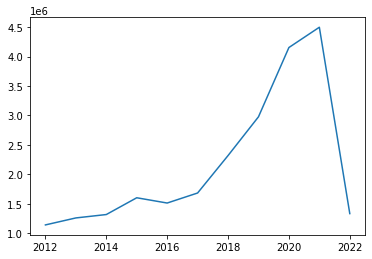

In [30]:
plt.plot(dw1)

**interpretation**:: in year 2021 close price is high

<AxesSubplot:xlabel='Year', ylabel='Number_of_Trades'>

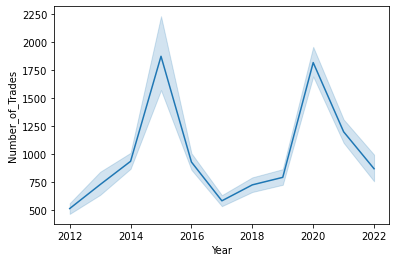

In [27]:
sns.lineplot(x='Year',y='Number_of_Trades',data=df_nestle_new)

**interpretation**: in year 2015 no of trading is high

<AxesSubplot:xlabel='Month', ylabel='Close_Price'>

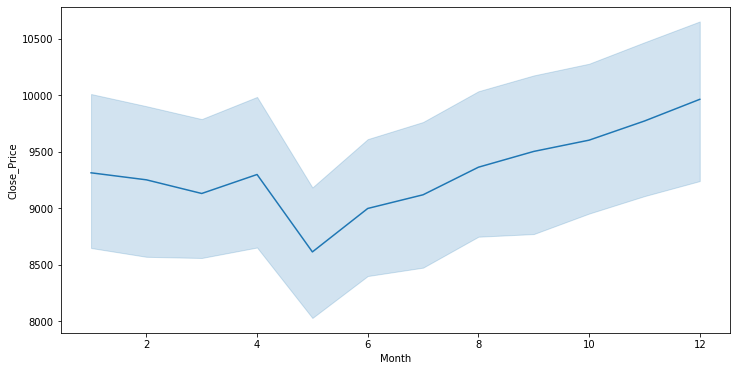

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='Close_Price',data=df_nestle_new)

**interpretation**: in month 12 close price is high and also we see that after 6 month price is increasing

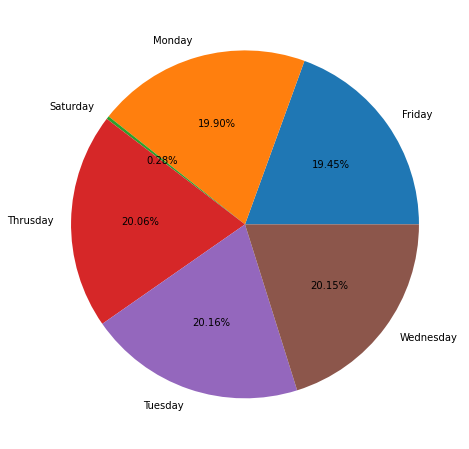

In [34]:
df_day=df_nestle_new.groupby('Day')['Close_Price'].sum().reset_index()
plt.figure(figsize=(10,8))
plt.pie(df_day['Close_Price'],labels=df_day['Day'],autopct='%1.2f%%')
plt.show()

**interpretation**: Here we see that saturday and sunday market is close so value of closing price is low and Tuesday,Wednesday,Thrusday, stock price is more

# Filter numerical and categorical variables

In [39]:
# Target Varible 
df_target=df_nestle['Close_Price']

# Drop Target variable 
df_feature=df_nestle.drop('Close_Price',axis=1)

# Numeric variable
df_num=df_nestle.select_dtypes(include=['number'])

# Categorical variable 
df_cat=df_nestle.select_dtypes(include=['object'])

# Scale Data

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scalled=ss.fit_transform(df_num)
df_scale=pd.DataFrame(scalled,columns=df_num.columns)
df_scale.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_avg_price_of_the_Day,Number_of_Shares,Number_of_Trades,Total_Turnover(Rs.),Deliverable_Quantity,Percentage_Deliverable_Quantity_to_Traded_Quantity,Spread_High_Low,Spread_Close_Open,Day,Month,Year
0,1.784804,1.834689,1.752755,1.801568,1.786903,-0.089483,0.673071,0.418534,-0.267485,-1.481716,3.413743,0.436242,0.698321,-0.684029,1.792207
1,1.774700,1.803002,1.802836,1.823451,1.820465,0.052472,0.278437,0.745633,0.163325,1.466601,1.114947,1.435815,-0.003854,-0.684029,1.792207
2,1.849610,1.863787,1.767661,1.748301,1.832547,-0.251306,-0.253307,0.066789,-0.190154,0.351828,3.827263,-3.254831,-0.706028,-0.684029,1.792207
3,1.814063,1.857066,1.859704,1.871343,1.864232,-0.386447,-0.367566,-0.234349,-0.312912,-0.616994,1.070080,1.700278,-1.408203,-0.684029,1.792207
4,1.829594,1.829944,1.850221,1.829575,1.839421,-0.419656,-0.399207,-0.311314,-0.311062,0.042140,0.561681,-0.090149,-0.003854,-0.684029,1.792207


# Train Test Split

In [52]:
x_full=df_scale.copy()
y_full=df_target.copy()

x_full=sm.add_constant(x_full)

x_train_full,x_test_full,y_train_full,y_test_full=train_test_split(x_full,y_full,random_state=1,test_size=0.3)

print('X_train_full', x_train_full.shape)
print('y_train_full', y_train_full.shape)

print('X_test_full', x_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (1785, 16)
y_train_full (1785,)
X_test_full (766, 16)
y_test_full (766,)


In [53]:
# after split we reset index
x_train_full=x_train_full.reset_index(drop=True)
y_train_full=y_train_full.reset_index(drop=True)
x_test_full=x_test_full.reset_index(drop=True)
y_test_full=y_test_full.reset_index(drop=True)

# Base Model

In [56]:
mlr_base_model=sm.OLS(y_train_full,x_train_full).fit()
print(mlr_base_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Close_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.335e+31
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:39:55   Log-Likelihood:                 41848.
No. Observations:                1785   AIC:                        -8.367e+04
Df Residuals:                    1771   BIC:                        -8.359e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

**interpretation**:Rsquared is a score of variation present in a target variable explain by independent variable #R^2=1 means 100% variation

# Model Evaluation

In [58]:
# R_Squerd
print("Base Model evolution")

x = mlr_base_model.rsquared
print("R Squared = ",x)
print("here in our case",x,"percent target veriable explain by Indepandant veriable")
print("----------------------------------------------------------------------------------")

# Ad_R_squared
y = mlr_base_model.rsquared_adj
print("adj R Squared = ",y)
print("here in our case",y,"percent target values explain by Indepandant veriable")
print("-----------------------------------------------------------------------------------")

# Condition No
z = mlr_base_model.condition_number
print("Condition Number",z)
print("Here in our case condition number is",z,"so the Severe Multicollinearity is present in the data")
print("-----------------------------------------------------------------------------------")

# Durbin Watson
# take it manually
a = 1.971
print("durbin Watson",a)
print("Here in our case Durbin watson score is",a,"so it meanse there is no autocorrelation")

Base Model evolution
R Squared =  1.0
here in our case 1.0 percent target veriable explain by Indepandant veriable
----------------------------------------------------------------------------------
adj R Squared =  1.0
here in our case 1.0 percent target values explain by Indepandant veriable
-----------------------------------------------------------------------------------
Condition Number 2.561018372984752e+16
Here in our case condition number is 2.561018372984752e+16 so the Severe Multicollinearity is present in the data
-----------------------------------------------------------------------------------
durbin Watson 1.971
Here in our case Durbin watson score is 1.971 so it meanse there is no autocorrelation


# Model Performance

In [61]:
#predict training data
train_predict=mlr_base_model.predict(x_train_full)
train_predict.head()

#predict testing data
test_predict=mlr_base_model.predict(x_test_full)
test_predict.head()

0   10521.050000
1   16374.150000
2    5152.700000
3    9810.400000
4    7194.800000
dtype: float64

In [62]:
#for train data
# MAE (Mean Absolute Error)
print("Base Model Performance")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_train_full,train_predict)
print("Mean Absolute Error is",round(MAE,2))
print("-----------------------------------------------------------------------------------\n")

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train_full,train_predict)
print("Mean Absolute Error is",round(MSE,2))
print("-----------------------------------------------------------------------------------\n")

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
print("Mean Squared Error is", round(RMSE,2))
print("-----------------------------------------------------------------------------------\n")


Base Model Performance
Mean Absolute Error is 0.0
-----------------------------------------------------------------------------------

Mean Absolute Error is 0.0
-----------------------------------------------------------------------------------

Mean Squared Error is 0.0
-----------------------------------------------------------------------------------



**interpretation**: Here we can see that the error in train data is 0

In [63]:
#for test data
# MAE (Mean Absolute Error)
print("Base Model Performance")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test_full,test_predict)
print("Mean Absolute Error is",round(MAE,2))
print("-----------------------------------------------------------------------------------\n")

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_full,test_predict)
print("Mean Absolute Error is",round(MSE,2))
print("-----------------------------------------------------------------------------------\n")

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
print("Mean Squared Error is", round(RMSE,2))
print("-----------------------------------------------------------------------------------\n")


Base Model Performance
Mean Absolute Error is 0.0
-----------------------------------------------------------------------------------

Mean Absolute Error is 0.0
-----------------------------------------------------------------------------------

Mean Squared Error is 0.0
-----------------------------------------------------------------------------------



Here we see that in test data error are zero. Train and test both data error is zero i.e. no overfitting or underfitting  and model is accurately predicted

# Final Model